In [8]:
import numpy as np
import random as rd
import time
import math
import matplotlib.pyplot as plt

In [9]:
def MaxCrossSubArray(A, low, mid, high):
    
    leftSum = -math.inf
    sum = 0
    for i in range(mid, -1, -1):
        sum = sum + A[i]
        if sum > leftSum:
            leftSum = sum
            maxLeft = i

    rightSum = -math.inf
    sum = 0
    for j in range(mid+1, high + 1, 1):
        sum = sum + A[j]
        if sum > rightSum:
            rightSum = sum
            maxRight = j

    return (maxLeft, maxRight, leftSum + rightSum)

In [10]:
def MaxSubArray(A, low, high):
    
    if low == high:
        return(low, high, A[low])
    else:
        mid = (low + high)//2
        (leftLow, leftHigh, leftSum) = MaxSubArray(A, low, mid)
        (rightLow, rightHigh, rightSum) = MaxSubArray(A, mid + 1, high)
        (crossLow, crossHigh, crossSum) = MaxCrossSubArray(A, low, mid, high)
        if leftSum >= rightSum and leftSum >= crossSum:
            return (leftLow, leftHigh, leftSum)
        elif rightSum >= leftSum and rightSum >= crossSum:
            return (rightLow, rightHigh, rightSum)
        else:
            return (crossLow, crossHigh, crossSum)

In [13]:
nu = [10,100,500,1000]
ti = []

for b in range(0,len(nu)):
  A = np.random.randint(-50,50, nu[b])
  start_time = time.time()
  (low, high, sm) = MaxSubArray(A, 0, len(A)-1)
  end_time = time.time()
  time_elapsed = end_time - start_time
  ti.append(time_elapsed)

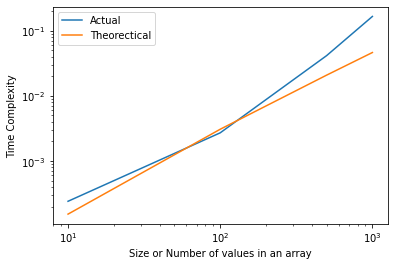

In [18]:
c = 1/150000
y_nlogn =[]

plt.xscale("log")
plt.yscale("log")
plt.xlabel('Size or Number of values in an array')
plt.ylabel('Time Complexity')


plt.plot(nu, ti, label='Actual')

y = nu*(np.log(nu))


for i in y:
  v = c*i
  y_nlogn.append(v)





plt.plot(nu, y_nlogn, label='Theorectical')


plt.legend()


